In [1]:
class ImportDefence:
    """This context manager ensures all `import` statements were successful,
    and if some weren't, it attempts a `pip install`.

    Source: https://raw.githubusercontent.com/ShZil/network-utilities/main/Scanner/import_handler.py

    This function handles a ModuleNotFoundError,
    attempting to install the not-found module using `pip install`,
    and restarting the script / instructing the user.

    **Usage:**
    ```py
    from import_handler import ImportDefence

    with ImportDefence():
        import module1
        from module2 import some_function
    ```
    """
    def __enter__(self):
        """To be a context manager, needs an `__enter__` method.

        Returns:
            Self@ImportDefence: the `self` object.
        """
        return self

    def __exit__(self, exc_type, exc_val, exc_tb):
        """Handles exiting the context.
        Pip-installs the requested packages and reboots the code.

        Args:
            exc_type (type | NoneType): the type of error.
            exc_val (Exception | NoneType): the exception raised.
            exc_tb (traceback | NoneType): a traceback object of the exception.

        Raises:
            exc_val: the exception, if it's not `ModuleNotFoundError`.
        """
        import os
        # If no ModuleNotFoundError occured, clear the screen and print and
        # return to original script.
        if exc_val is None:
            os.system('cls')
            # print("All imports were successful.")
            return
        # Otherwise, raise the exception.
        try:
            raise exc_val
        # If the exception is of type ModuleNotFoundError, handle it:
        except ModuleNotFoundError as err:
            import sys
            from subprocess import check_call as do_command, CalledProcessError

            to_install = err.name
            # Some modules have `pip install X` and `import Y`, where `X != Y`.
            # These have to be added manually, since there's no pattern.
            name_map = {
                'cv2': 'opencv-python',
                'Crypto': 'pycryptodome',
                'PIL': 'pillow',
                '_curses': 'windows-curses',
                'bidi': 'python-bidi'
            }
            to_install = to_install.split('.')[0]
            if 'win32' in to_install:
                to_install = 'pywin32'
            if to_install in name_map:
                to_install = name_map[to_install]

            print(
                f"Module `{err.name}` was not found. Attempting `pip install {to_install}`...\n"
            )
            try:
                do_command(
                    [sys.executable, "-m", "pip", "install", to_install]
                )
            except CalledProcessError:
                if_different = f"" if to_install == err.name else f" (from `{err.name}`)"
                print(
                    f"\nModule `{to_install}`{if_different} could not be pip-installed. Please install manually."
                )
                sys.exit(1)
            argv = ['\"' + sys.argv[0] + '\"'] + sys.argv[1:]
            os.execv(sys.executable, ['python'] + argv)
        # If the exception is of type ImportError, log an error and keep raising it.
        except ImportError:
            print("You've misnamed your import. Check it.")
            raise

In [ ]:
with ImportDefence():
    import numpy as np
    import sounddevice as sd
    import matplotlib.pyplot as plt

In [71]:
# clock sync

# Parameters
frequencies = [100, 3000]
duration = 1.0   # Duration in seconds
sampling_rate = 44100  # Sampling rate in samples per second

# Generate the time values
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate the audio signal (a sine wave)
phi = np.linspace(*frequencies, t.size)  # Frequency modulation
audio_signal = np.sin(np.pi * phi * t)

# Wait until the audio is done playing
sd.play(audio_signal, sampling_rate)
sd.wait()


# Plot the audio signal
plt.figure()
plt.specgram(audio_signal, Fs=sampling_rate, NFFT=2048, noverlap=500, cmap='viridis')
plt.show()

<IPython.core.display.Javascript object>

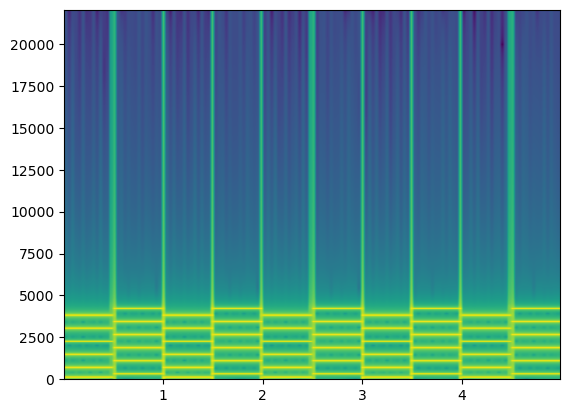

In [67]:
%matplotlib inline
with ImportDefence():
    import numpy as np
    import sounddevice as sd
    import matplotlib.pyplot as plt

# Parameters
frequency = 500  # Frequency in Hz
frequencies = np.linspace(100, 4000, 6)
duration = 5.0   # Duration in seconds
sampling_rate = 44100  # Sampling rate in samples per second
bits_per_sec = 2  # Number of bits per sample

# Generate the time values
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate the audio signal (a sine wave)
# phi = np.linspace(0, 14000, t.size)  # Frequency modulation
# audio_signal = np.sin(np.pi * phi * t)

offset = np.tile(np.append(-np.ones(sampling_rate//bits_per_sec), np.ones(sampling_rate//bits_per_sec)), bits_per_sec * int(duration) // 2) * 200
audio_signal = np.sum(np.array([np.sin(2 * np.pi * (f + offset) * t) for f in frequencies]), axis=0)
# Play the audio signal
sd.play(audio_signal, sampling_rate)

# Wait until the audio is done playing
sd.wait()

# Plot the audio signal
plt.figure()
plt.specgram(audio_signal, Fs=sampling_rate, NFFT=2048, noverlap=500, cmap='viridis')
plt.show()

In [49]:
sampling_rate / bits_per_sec

22050.0

In [68]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the WAV file
filename = 'call2.wav'  # Replace with your WAV file path
sampling_rate, audio_signal = wavfile.read(filename)

# If stereo, take only one channel
if len(audio_signal.shape) > 1:
    audio_signal = audio_signal[:, 0]

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.specgram(audio_signal, Fs=sampling_rate, NFFT=1024, noverlap=512, cmap='viridis')
plt.title('Spectrogram of WAV file')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Intensity [dB]')
plt.xlim(14, 19)
plt.ylim(0, 4000)
plt.show()

<IPython.core.display.Javascript object>